# Split .trHMM

## 0. Libraries

In [443]:
import pandas as pd
import numpy as np
import math
import sys
import random
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load data

In [444]:
##### Format:
##### AA
##### Amino Acid sequence
##### SS
##### Secondary Structure sequence

In [445]:
# DB1 = sys.argv[1]
# orders = str(sys.argv[2])
# seqlen = int(sys.argv[3])

species = 'Bsubtilis'
orders = '8'
seqlen = 100

file_path = 'C:/Users/alibe/Desktop/Project/training_files/XXX/06_XXX_YYY_ZZZ'
file_path = file_path.replace('XXX', species).replace('ZZZ', orders)
path = file_path + '.trHMM'
training_file_1 = open(path.replace('YYY', species))
training_file_2 = open(path.replace('YYY', 'Ecoli'))

In [446]:
lines_1 = training_file_1.read().splitlines()
AA_seq_1 = lines_1[1]
SS_seq_1 = lines_1[3]

lines_2 = training_file_2.read().splitlines()
AA_seq_2 = lines_2[1]
SS_seq_2 = lines_2[3]

In [447]:
AA_list = ['*','A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','X','Y']

if file_path[-1] == '8':
    SS_list = ['*','B','C','E','G','H','I','S','T']
elif file_path[-1] == '3':
    SS_list = ['*','C','E','H']

## 2. Create equal lines

In [448]:
nseq = int(len(AA_seq_1) // seqlen)
seqstarts = []
for i in range(nseq):
    seqstarts.append(i * seqlen)

In [449]:
AA_seq_eq_list_1 = []
SS_seq_eq_list_1 = []

for i in seqstarts:
    AA_seq_eq_list_1.append(AA_seq_1[i:i+seqlen])
    SS_seq_eq_list_1.append(SS_seq_1[i:i+seqlen])

In [450]:
AA_seq_eq_list_2 = []
SS_seq_eq_list_2 = []

for i in seqstarts:
    AA_seq_eq_list_2.append(AA_seq_2[i:i+seqlen])
    SS_seq_eq_list_2.append(SS_seq_2[i:i+seqlen])

## 3. Function to fill matrices

In [451]:
def fill_matrix(list1, list2):
    global count_matrix_list
    count_matrix_list = []
    for split in range(len(list1)):
        count_matrix = np.zeros((len(SS_list), len(AA_list)))
        for i in range(len(list1[split])):
            for j in range(len(AA_list)):
                if list1[split][i] == AA_list[j]:
                    for k in range(len(SS_list)):
                        if list2[split][i] == SS_list[k]:
                            count_matrix[k,j] += 1
        count_matrix = pd.DataFrame(count_matrix, index=SS_list, columns=AA_list)
        count_matrix_list.append(count_matrix)
        print('\rMatrices made: {:%}'.format(split / (len(list1) - 1)), end = '')
    return count_matrix_list

In [452]:
res_list_1 = fill_matrix(AA_seq_eq_list_1, SS_seq_eq_list_1)

Matrices made: 100.000000%

In [453]:
res_list_2 = fill_matrix(AA_seq_eq_list_2, SS_seq_eq_list_2)

Matrices made: 100.000000%

In [454]:
pd.concat(res_list_1).to_csv(file_path.replace('06', '07').replace('XXX', species).replace('YYY', species) + '.csv')
pd.concat(res_list_2).to_csv(file_path.replace('06', '07').replace('XXX', species).replace('YYY', 'Ecoli') + '.csv')

## 4. Function to calculate distance

In [455]:
def distance_calculator(matrix1, matrix2):
    EuD = 0
    for i in range(len(matrix1)):
        for j in range(len(matrix1.columns)):
            Y = matrix1.iloc[i, j] / matrix1.to_numpy().sum()
            E = matrix2.iloc[i, j] / matrix2.to_numpy().sum()
            EuD += math.sqrt((Y - E) ** 2)
    return EuD

In [456]:
E_dis_list = []
for i in range(len(res_list_1)):
    E_dis_list.append(distance_calculator(res_list_1[i], res_list_2[i]))
    print('\rDone: {:%}'.format(i / (len(res_list_1) - 1)), end = '')

Done: 100.000000%

## 5. Table

In [457]:
table = pd.DataFrame(E_dis_list, columns=['Distance'])

In [458]:
table.to_csv(file_path.replace('06', '08').replace('XXX', species).replace('YYY', 'distances') + '.csv')

(array([15., 10., 16., 13., 21.,  4.,  5.,  3.,  1.,  1.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ]),
 <a list of 10 Patch objects>)

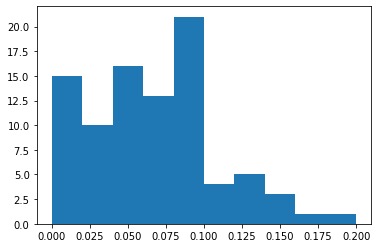

In [459]:
plt.hist(E_dis_list)